# Finnhub
- API version: 1.0.0
- Package version: 2.4.19
- API Documentation: https://finnhub.io/docs/api/company-news
- Finnhub's official python library: https://github.com/Finnhub-Stock-API/finnhub-python

## Company News
List latest company news by symbol. This endpoint is only available for North American companies.
Free plan allow us 1 year of historical news and new updates.

In [1]:
from datetime import datetime

# Define the YEAR
YEAR = 2023

# Define the TICKER
TICKERS = ["AAPL","MSFT","GOOG","AMZN"]

# Define the quarters
quarters = {
    "Q1": {"start": datetime(YEAR, 1, 1).date(), "end": datetime(YEAR, 3, 31).date()},
    "Q2": {"start": datetime(YEAR, 4, 1).date(), "end": datetime(YEAR, 6, 30).date()},
    "Q3": {"start": datetime(YEAR, 7, 1).date(), "end": datetime(YEAR, 9, 30).date()},
    "Q4": {"start": datetime(YEAR, 10, 1).date(), "end": datetime(YEAR, 12, 31).date()},
    "TEST": {"start": datetime(YEAR, 12, 14).date(), "end": datetime(YEAR, 12, 19).date()},
}

# Access the concrete quarter
quarter = quarters['Q4']

print(f"TICKERS: {TICKERS}")
print(f"START:   {quarter['start']} \nEND:     {quarter['end']}")

TICKERS: ['AAPL', 'MSFT', 'GOOG', 'AMZN']
START:   2023-10-01 
END:     2023-12-31


In [2]:
# Import the finnhub library, which provides a Python client for the Finnhub API
import finnhub
from time import sleep

# Create a new Finnhub client using a provided API key
finnhub_client = finnhub.Client(api_key="cl0hvnpr01qn90kn213gcl0hvnpr01qn90kn2140")

articles = []

# Fetch company news for IBM within a specific date range
for index, ticker in enumerate(TICKERS):

    print(f"Fetching news for {ticker}")
    articles.append(finnhub_client.company_news(ticker, _from=quarter['start'], to=quarter['end']))
    sleep(1)
    print(f'Fetched articles: {len(articles[index])}')


# Display the first fetched article
display(articles[0][0])

Fetching news for AAPL
Fetched articles: 221
Fetching news for MSFT
Fetched articles: 213
Fetching news for GOOG
Fetched articles: 216
Fetching news for AMZN
Fetched articles: 219


{'category': 'company',
 'datetime': 1703086126,
 'headline': 'Apple ramps up Vision Pro production, plans February launch - Bloomberg News',
 'id': 124634836,
 'image': '',
 'related': 'AAPL',
 'source': 'Finnhub',
 'summary': 'Apple is ramping upproduction of the Vision Pro mixed-reality headset, setting thestage for a launch by February, Bloomberg News reported onWednesday, citing people with knowledge of the...',
 'url': 'https://finnhub.io/api/news?id=8c4795f007a3d84a91213bdb8af26b99bc01653ece5fbbedabce1b9bd70108df'}

In [3]:
import pandas as pd
from datetime import datetime

# Define a function to get the news volume for each day
def get_news_volume(articles, ticker) -> pd.DataFrame:
    # Initialize an empty dictionary to store the news volume
    news_volume = {}

    date_range = pd.date_range(start=quarter['start'], end=quarter['end'], freq='D')
    df = pd.DataFrame({'Date': pd.Series(dtype='object'), 'News Volume': pd.Series(dtype='int')})
    df['Date'] = date_range
    df = df.set_index('Date')

    # Iterate over each article
    for article in articles:
        # Convert the article's datetime to a pandas Timestamp object
        date = pd.Timestamp(datetime.utcfromtimestamp(article['datetime']).strftime("%Y-%m-%d"))

        #print(f"Article published time: {date}")

        if date in news_volume:
            news_volume[date] += 1
        else:
            news_volume[date] = 1

    df['News Volume'] = news_volume
    df['News Volume'].fillna(0, inplace=True)
    print(f"TICKER: {ticker}")
    print(f"Articles counted {int(sum(df['News Volume'].values))}")

    df['News Volume'] = news_volume
    
    for date, volume in news_volume.items():
        print(f"{date} [{volume}] {date.strftime('%A')}")

    # Return the dictionary of news volume
    return df

In [4]:
news_volume_dfs = [get_news_volume(articles[i], TICKERS[i]) for i in range(4)]

TICKER: AAPL
Articles counted 221
2023-12-20 00:00:00 [7] Wednesday
2023-12-19 00:00:00 [76] Tuesday
2023-12-18 00:00:00 [89] Monday
2023-12-17 00:00:00 [8] Sunday
2023-12-16 00:00:00 [11] Saturday
2023-12-15 00:00:00 [30] Friday
TICKER: MSFT
Articles counted 213
2023-12-20 00:00:00 [9] Wednesday
2023-12-19 00:00:00 [70] Tuesday
2023-12-18 00:00:00 [46] Monday
2023-12-17 00:00:00 [10] Sunday
2023-12-16 00:00:00 [16] Saturday
2023-12-15 00:00:00 [62] Friday
TICKER: GOOG
Articles counted 216
2023-12-20 00:00:00 [3] Wednesday
2023-12-19 00:00:00 [52] Tuesday
2023-12-18 00:00:00 [21] Monday
2023-12-17 00:00:00 [8] Sunday
2023-12-16 00:00:00 [13] Saturday
2023-12-15 00:00:00 [38] Friday
2023-12-14 00:00:00 [55] Thursday
2023-12-13 00:00:00 [26] Wednesday
TICKER: AMZN
Articles counted 219
2023-12-20 00:00:00 [5] Wednesday
2023-12-19 00:00:00 [66] Tuesday
2023-12-18 00:00:00 [80] Monday
2023-12-17 00:00:00 [13] Sunday
2023-12-16 00:00:00 [16] Saturday
2023-12-15 00:00:00 [39] Friday


In [5]:
import matplotlib.pyplot as plt

# Define a dictionary of ggplot styles to customize the appearance of the plots
ggplot_styles = {
    'axes.edgecolor': 'white',  # Color of the edge of the axes
    'axes.facecolor': 'EBEBEB',  # Color of the face of the axes
    'axes.grid': True,  # Whether to display the grid
    'axes.grid.which': 'both',  # Which grid lines to draw
    'axes.spines.left': False,  # Whether to display the left spine
    'axes.spines.right': False,  # Whether to display the right spine
    'axes.spines.top': False,  # Whether to display the top spine
    'axes.spines.bottom': False,  # Whether to display the bottom spine
    'grid.color': 'white',  # Color of the grid lines
    'grid.linewidth': '1.2',  # Width of the grid lines
    'xtick.color': '555555',  # Color of the x-ticks
    'xtick.major.bottom': True,  # Whether to draw the major x-ticks at the bottom
    'xtick.minor.bottom': False,  # Whether to draw the minor x-ticks at the bottom
    'ytick.color': '555555',  # Color of the y-ticks
    'ytick.major.left': True,  # Whether to draw the major y-ticks at the left
    'ytick.minor.left': False,  # Whether to draw the minor y-ticks at the left
}

# Update the current matplotlib parameters with the ggplot styles
plt.rcParams.update(ggplot_styles)

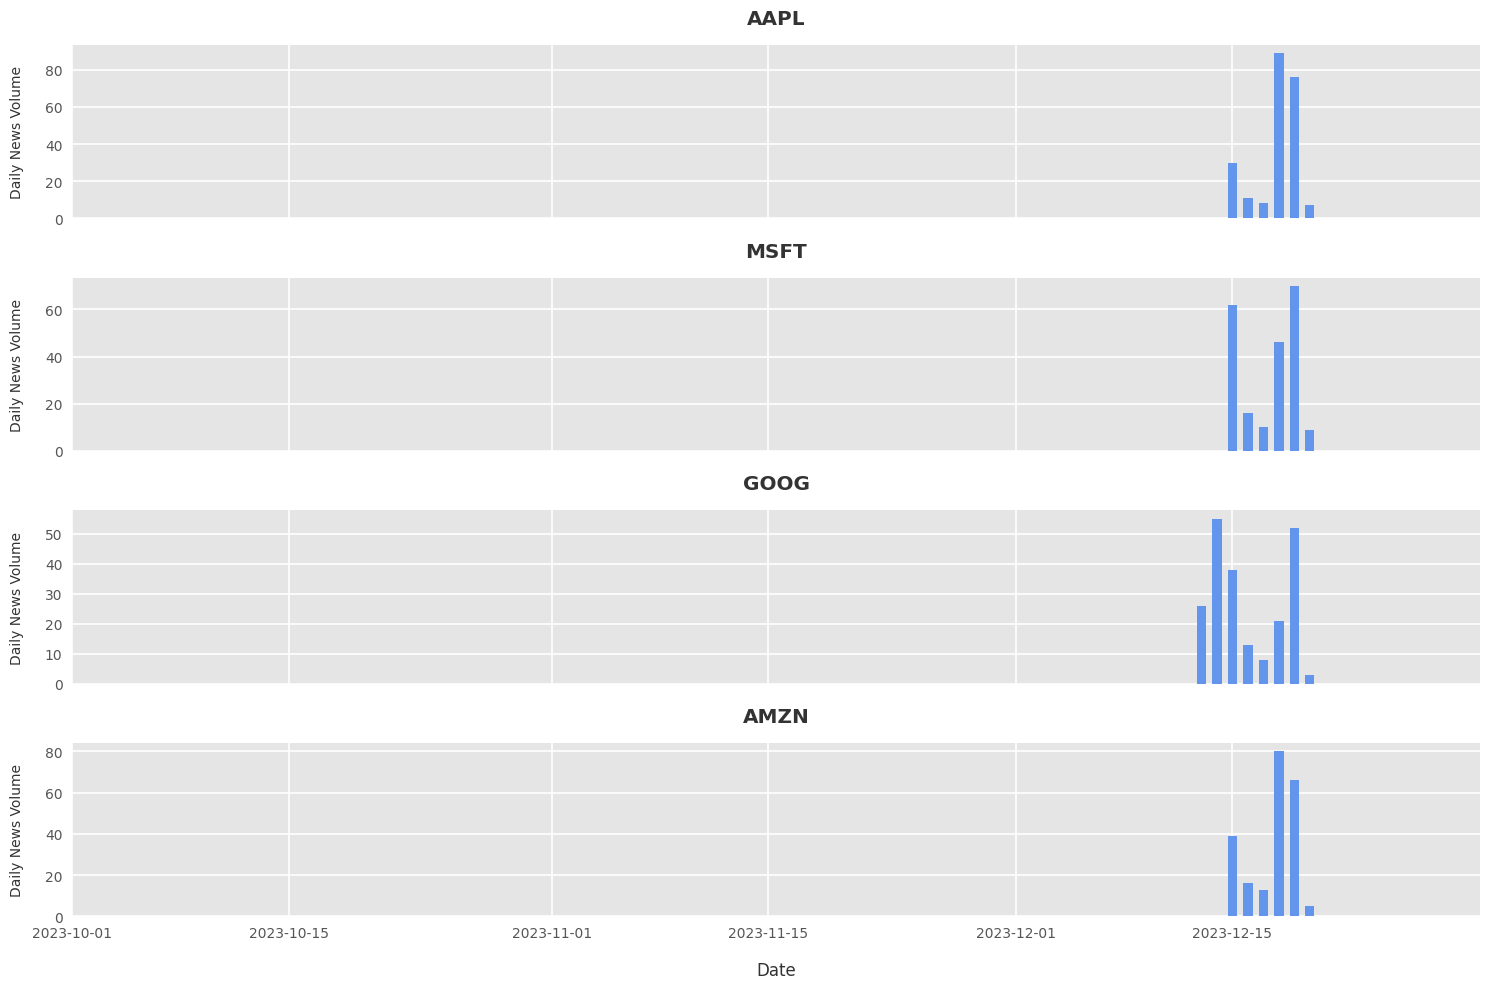

In [8]:
import matplotlib.pyplot as plt

# Set the style of the plot
plt.style.use('ggplot')
fig, axes = plt.subplots(4, sharex=True, figsize=(15, 10))
#ax.set_title('Daily Published Stock News Volume', pad=30, color='#333333',

for index,ax in enumerate(axes):
    ax.set_title(TICKERS[index], pad=15, color='#333333',
                weight='bold')
    if (index == 3):
        ax.set_xlabel('Date', labelpad=15, color='#333333')
    ax.set_ylabel('Daily News Volume', labelpad=15, color='#333333', fontsize='medium')
    ax.bar(news_volume_dfs[index].index, news_volume_dfs[index]['News Volume'], width=0.6, color='cornflowerblue', zorder=1)
    ax.set_xlim([news_volume_dfs[index].index.min(), news_volume_dfs[index].index.max()])
    ax.grid(True)
    ax.tick_params(bottom=False, left=False)

# Adjust layout for better spacing
fig.tight_layout()

plt.show()

In [9]:
display(articles)

[[{'category': 'company',
   'datetime': 1703086126,
   'headline': 'Apple ramps up Vision Pro production, plans February launch - Bloomberg News',
   'id': 124634836,
   'image': '',
   'related': 'AAPL',
   'source': 'Finnhub',
   'summary': 'Apple is ramping upproduction of the Vision Pro mixed-reality headset, setting thestage for a launch by February, Bloomberg News reported onWednesday, citing people with knowledge of the...',
   'url': 'https://finnhub.io/api/news?id=8c4795f007a3d84a91213bdb8af26b99bc01653ece5fbbedabce1b9bd70108df'},
  {'category': 'company',
   'datetime': 1703083444,
   'headline': 'Right-wing social media platform Parler plans to relaunch early next year',
   'id': 124634812,
   'image': '',
   'related': 'AAPL',
   'source': 'Finnhub',
   'summary': 'NEW YORK — The social media platform Parler, which caters to right-wing voices and was temporarily booted offline following the Jan. 6 insurrection, is relaunching ahead of next year’s...',
   'url': 'https://fi